In [39]:
import pandas as pd

titanic_df = pd.read_csv('titanic_train.csv')
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [40]:
#  missing values
missing_values = titanic_df.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


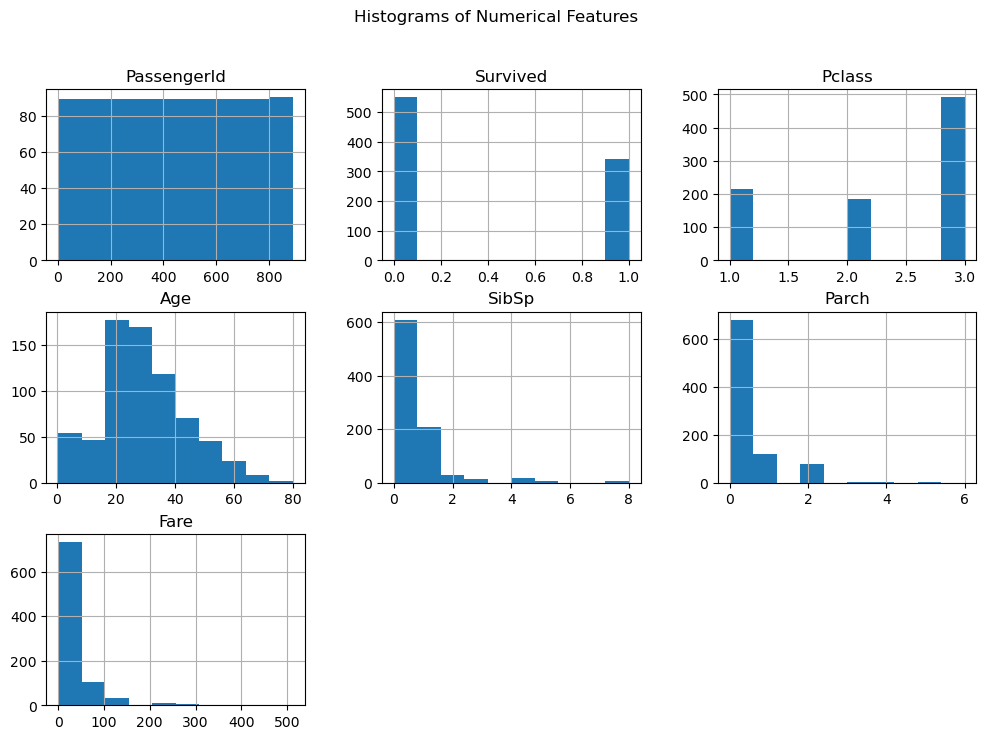

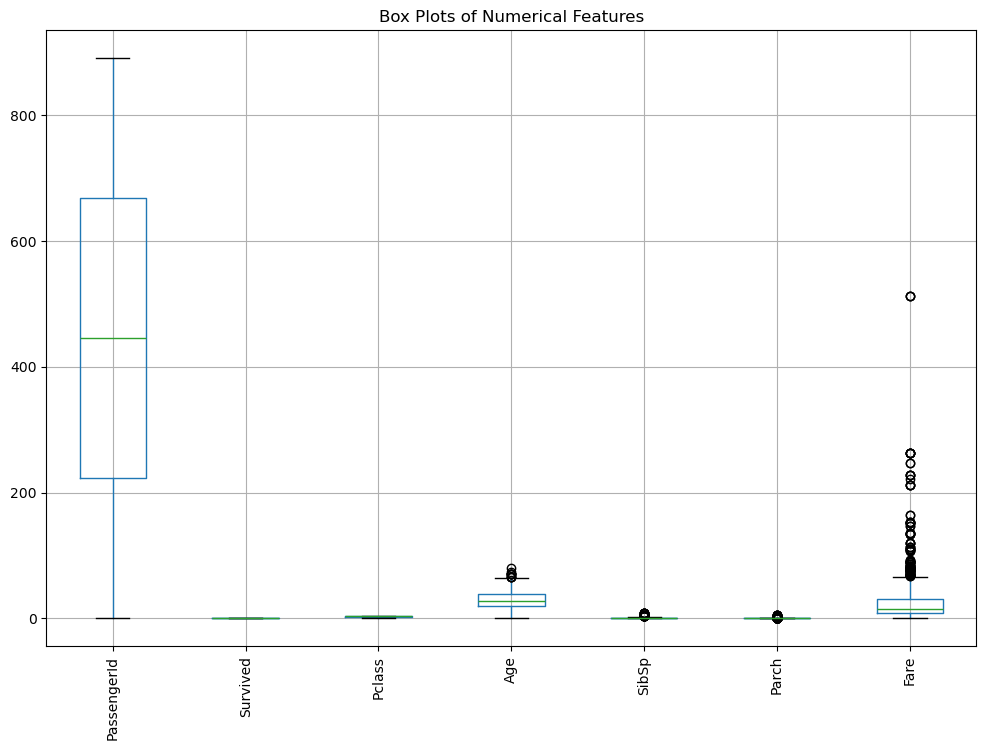

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
titanic_df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot box plots 
plt.figure(figsize=(12, 8))
titanic_df.boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()


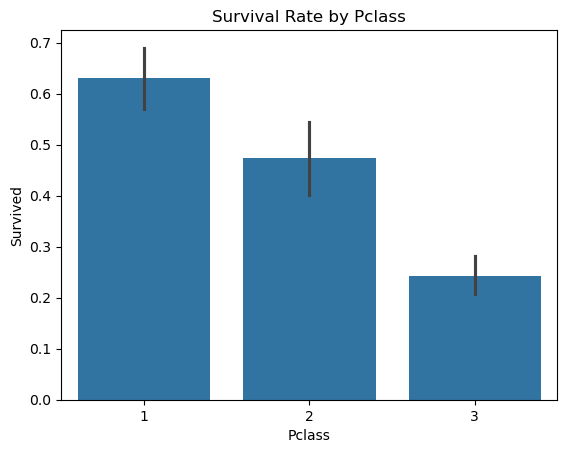

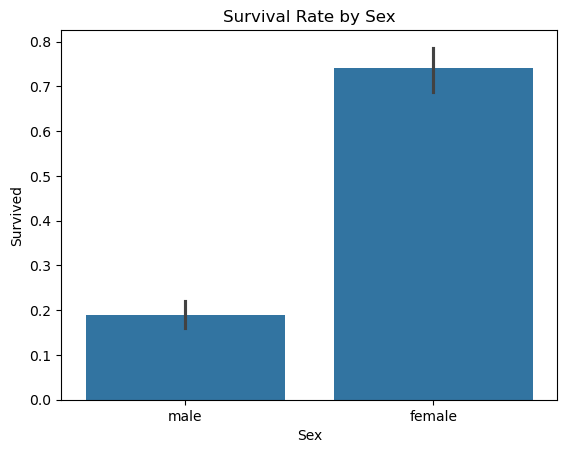

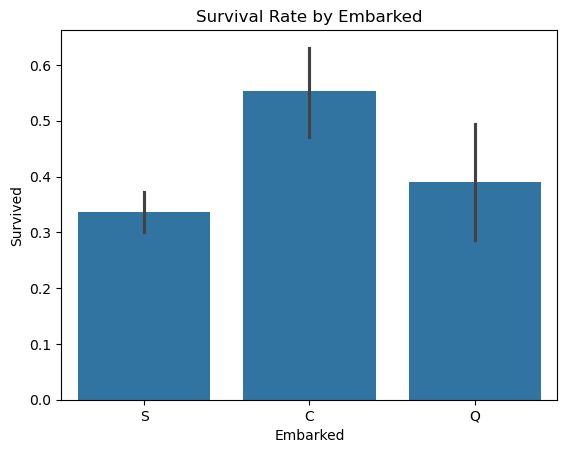

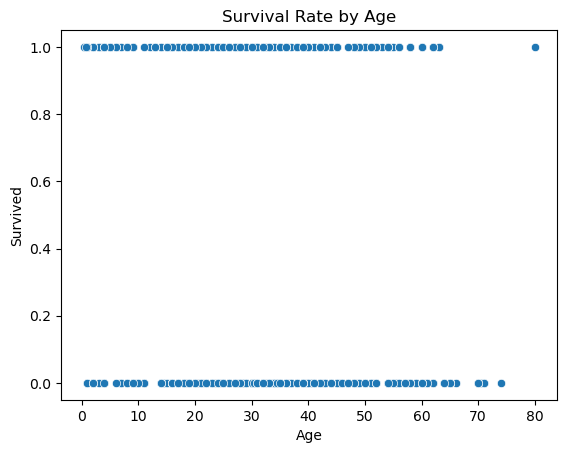

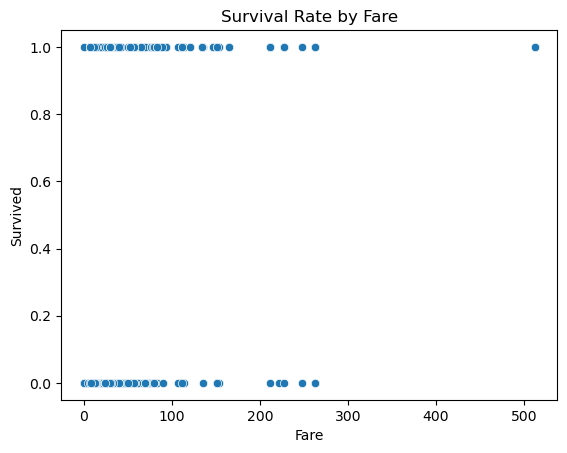

In [42]:
# Bar plot for categorical features against survival
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.barplot(x=feature, y='Survived', data=titanic_df)
    plt.title(f'Survival Rate by {feature}')
    plt.show()

# Scatter plot for numerical features against survival
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    sns.scatterplot(x=feature, y='Survived', data=titanic_df)
    plt.title(f'Survival Rate by {feature}')
    plt.show()


# Data Preprocessing

In [43]:
# Filling missing values in 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Filling missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

print(titanic_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [44]:
# One-hot encode categorical features
titanic_df_encoded = pd.get_dummies(titanic_df, columns=categorical_features, drop_first=True)

# Drop columns that won't be used
titanic_df_encoded.drop(columns=['Name', 'Ticket'], inplace=True)

print(titanic_df_encoded.head())


   PassengerId  Survived   Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  \
0            1         0  22.0      1      0   7.2500         0         1   
1            2         1  38.0      1      0  71.2833         0         0   
2            3         1  26.0      0      0   7.9250         0         1   
3            4         1  35.0      1      0  53.1000         0         0   
4            5         0  35.0      0      0   8.0500         0         1   

   Sex_male  Embarked_Q  Embarked_S  
0         1           0           1  
1         0           0           0  
2         0           0           1  
3         0           0           1  
4         1           0           1  


# Building Predictive Models

In [45]:
from sklearn.model_selection import train_test_split

# Defineing features and target
X = titanic_df_encoded.drop('Survived', axis=1)
y = titanic_df_encoded['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


In [47]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:33:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
# Evaluateing LightGBM model
accuracy_lgb, precision_lgb, recall_lgb, f1_lgb = evaluate_model(y_test, y_pred_lgb)

# Evaluateing XGBoost model
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(y_test, y_pred_xgb)

print(f'LightGBM - Accuracy: {accuracy_lgb}, Precision: {precision_lgb}, Recall: {recall_lgb}, F1 Score: {f1_lgb}')
print(f'XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}')


LightGBM - Accuracy: 0.8156424581005587, Precision: 0.7887323943661971, Recall: 0.7567567567567568, F1 Score: 0.7724137931034483
XGBoost - Accuracy: 0.8044692737430168, Precision: 0.76, Recall: 0.7702702702702703, F1 Score: 0.7651006711409396


In [49]:
from sklearn.model_selection import GridSearchCV

#  the hyperparameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Create a GridSearchCV object with LightGBM
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X_train, y_train)

# hyperparameters and the best score
lgb_best_params = lgb_grid.best_params_
lgb_best_score = lgb_grid.best_score_

print("Best parameters for LightGBM:", lgb_best_params)
print("Best cross-validation accuracy for LightGBM:", lgb_best_score)

#  hyperparameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV object with XGBoost
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False), xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# hyperparameters and the best score
xgb_best_params = xgb_grid.best_params_
xgb_best_score = xgb_grid.best_score_

print("Best parameters for XGBoost:", xgb_best_params)
print("Best cross-validation accuracy for XGBoost:", xgb_best_score)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Comparative Analysis

In [50]:
print(f'LightGBM - Accuracy: {accuracy_lgb}, Precision: {precision_lgb}, Recall: {recall_lgb}, F1 Score: {f1_lgb}')
print(f'XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}')


LightGBM - Accuracy: 0.8156424581005587, Precision: 0.7887323943661971, Recall: 0.7567567567567568, F1 Score: 0.7724137931034483
XGBoost - Accuracy: 0.8044692737430168, Precision: 0.76, Recall: 0.7702702702702703, F1 Score: 0.7651006711409396


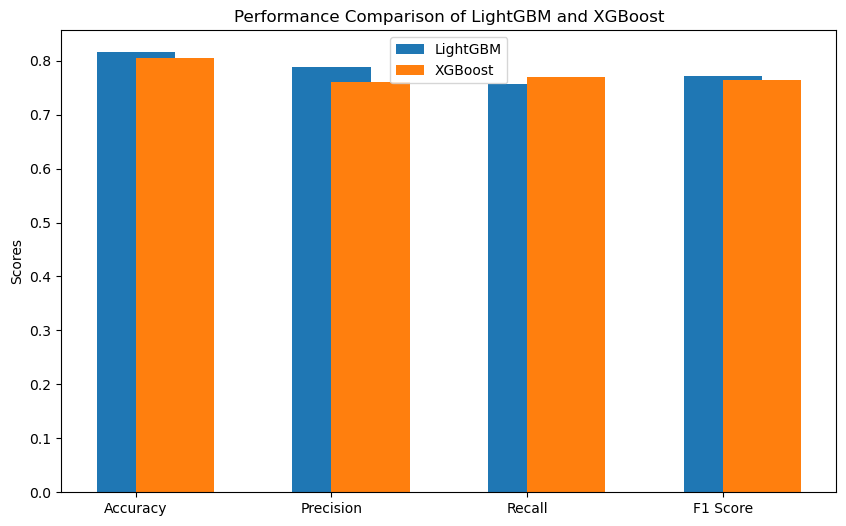

In [51]:
# Visualization of performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb]
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4

ax.bar(metrics, lgb_scores, width=width, label='LightGBM', align='center')
ax.bar(metrics, xgb_scores, width=width, label='XGBoost', align='edge')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of LightGBM and XGBoost')
ax.legend()

plt.show()
